# Algorithm Analysis

In [1]:
from pathlib import Path

In [2]:
p = Path('/Users/olli/Desktop/PythonNotebooks')
sub_dir = 'pics'
pics = p/sub_dir
pics

WindowsPath('/Users/olli/Desktop/PythonNotebooks/pics')

## Introduction to asymptotic analysis

How do you compare algorithm efficiency? 

In [3]:
def sum1(n):
    final_sum = 0
    
    for x in range(n+1):
        final_sum += x 
        
    return final_sum

In [4]:
sum1(10)

55

In [5]:
def sum2(n):
    return (n*(n+1))//2

In [6]:
sum2(10)

55

Notice both functions have the same result, but completely different algorithms.  The first function iteratively adds the numbers, while the second function makes use of:
$$ \sum_{i=0}^{n} {i} = \frac{n(n+1)}{2} $$

The [```%timeit```](https://ipython.org/ipython-doc/3/interactive/magics.html#magic-timeit) magic in Jupyter Notebooks will repeat the loop iteration a certain number of times and take the best result. Check out the link for the documentation. 

In [7]:
%timeit sum1(100)

5.41 µs ± 482 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [8]:
%timeit sum2(100)

182 ns ± 10.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Timing evaluation is not the best objective method. We need something that is hardware independent. **Big-O** notation is a better way to evaluate theory.

Now we want to develop a notation to objectively compare the efficiency of these two algorithms. A good place to start would be to compare the number of assignments each algorithm makes.
______
Now we will discuss how we can formalize this notation and idea.

Big-O notation describes *how quickly runtime will grow relative to the input as the input get arbitrarily large*. It is the worse case scenario or the **upper bound of the cost function** 

Let's examine some of these points more closely:

* Remember, we want to compare how quickly runtime will grow, not compare exact runtimes, since those can vary depending on hardware.

* Since we want to compare for a variety of input sizes, we are only concerned with how runtime grows *relative* to the input. This is why we use **n** for notation.

* As n gets arbitrarily large we only worry about terms that will grow the fastest as n gets large, to this point, Big-O analysis is also known as **asymptotic analysis**


As for syntax sum1() can be said to be **O(n)** since its runtime grows linearly with the input size. In the next lecture we will go over more specific examples of various O() types and examples. To conclude this lecture we will show the potential for vast difference in runtimes of Big-O functions.

## Runtimes of Common Big-O Functions

Here is a table of common Big-O functions:

<table>
<tr>
    <th><strong>Big-O</strong></th>
    <th><strong>Name</strong></th>
</tr>
<tr>
    <td>1</td>
    <td>Constant</td>
</tr>
<tr>
    <td>log(n)</td>
    <td>Logarithmic</td>
</tr>
    <tr><td>n</td>
    <td>Linear</td>
</tr>
    <tr><td>nlog(n)</td>
    <td>Log Linear</td>
</tr>
    <tr><td>n^2</td>
    <td>Quadratic</td>
</tr>
    <tr><td>n^3</td>
    <td>Cubic</td>
</tr>
    <tr><td>2^n</td>
    <td>Exponential</td>
</tr>
</tr>
    <tr><td>n!</td>
    <td>Factorial</td>
</tr>
</table>

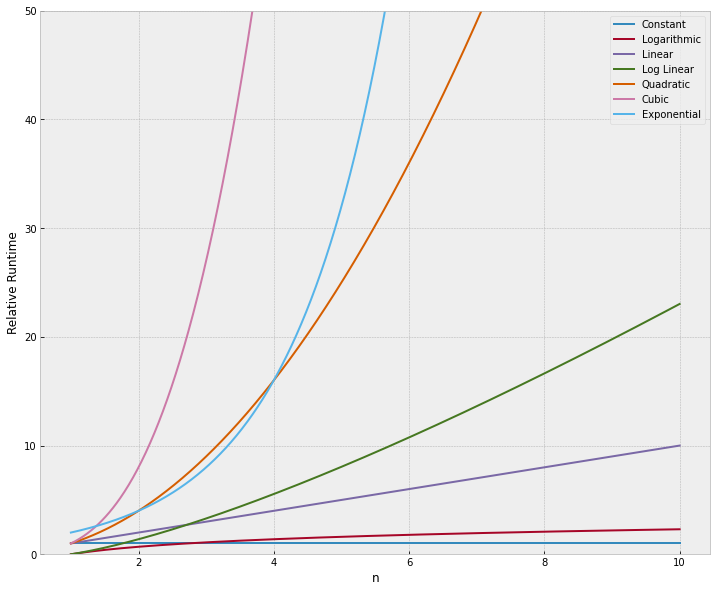

In [9]:
from math import log
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('bmh')

# Set up runtime comparisons
n = np.linspace(1,10,1000)
labels = ['Constant','Logarithmic','Linear','Log Linear','Quadratic','Cubic','Exponential']
big_o = [np.ones(n.shape),np.log(n),n,n*np.log(n),n**2,n**3,2**n]

# Plot setup
plt.figure(figsize=(12,10))
plt.ylim(0,50)

for i in range(len(big_o)):
    plt.plot(n,big_o[i],label = labels[i])


plt.legend(loc=0)
plt.ylabel('Relative Runtime')
plt.xlabel('n')
plt.show()

## Big O Examples

### O(1) Constant

In [10]:
def func_constant(values):
    '''
    Prints first item in a list of values.
    '''
    print(values[0])
    
func_constant([1,2,3])

1


Note how this function is constant because regardless of the list size, the function will only ever take a constant step size, in this case 1, printing the first value from a list. So we can see here that an input list of 100 values will print just 1 item, a list of 10,000 values will print just 1 item, and a list of **n** values will print just 1 item!

### O(n) Linear

In [11]:
def func_lin(lst):
    '''
    Takes in list and prints out all values
    '''
    for val in lst:
        print(val)
        
func_lin([1,2,3])

1
2
3


This function runs in O(n) (linear time). This means that the number of operations taking place scales linearly with n, so we can see here that an input list of 100 values will print 100 times, a list of 10,000 values will print 10,000 times, and a list of **n** values will print **n** times.

In [12]:
def linear_search(data, value):
    for index in range(len(data)):
        if value == data[index]:
            return index
    raise ValueError('Value not found in the list')
    
if __name__ == '__main__':
    data = [1, 2, 9, 8, 3, 4, 7, 6, 5]
    # worst case is value of 5 since it is the last element
    print(linear_search(data, 5))

8


### O(n^2) Quadratic

In [13]:
def func_quad(lst):
    '''
    Prints pairs for every item in list.
    '''
    [print(f'x: {x}',f'y: {y}') for x in lst for y in lst]
            
lst = [0, 1, 2, 3]

func_quad(lst)

x: 0 y: 0
x: 0 y: 1
x: 0 y: 2
x: 0 y: 3
x: 1 y: 0
x: 1 y: 1
x: 1 y: 2
x: 1 y: 3
x: 2 y: 0
x: 2 y: 1
x: 2 y: 2
x: 2 y: 3
x: 3 y: 0
x: 3 y: 1
x: 3 y: 2
x: 3 y: 3


Note how we now have two loops, **one nested inside another**. This means that for a list of n items, we will have to perform n operations for *every item in the list!* This means in total, we will perform n times n assignments, or n^2. So a list of 10 items will have 10^2, or 100 operations. 

## O(log n) Logarithmic

An algorithm is said to have a logarithmic time complexity when it **reduces the size of the input data in each step** (it doesn't need to look at all values of the input data). 
Algorithms with logarithmic time complexity are commonly found in operations on binary trees or when using binary search.

In [14]:
# i is multiplied by 3 each time so this is logarithmic time
i = 1 
n = 20 

while i < n: 
    print('hello')
    i = i*3 

hello
hello
hello


In [15]:
# Note on integer division 
8//3

2

In [16]:
# the data that needs to be searched is halved at each iteration
def binary_search(data, value):
    n = len(data)
    left = 0
    right = n - 1
    while left <= right:
        middle = (left + right) // 2
#         print(f'left : {left}\nright : {right}\nmiddle : {middle}')
        if value < data[middle]:
            right = middle - 1
        elif value > data[middle]:
            left = middle + 1
        else:
            return middle
    raise ValueError('Value is not in the list')
    
if __name__ == '__main__':
    data = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    print(f'index of value : {binary_search(data, 3)}')

index of value : 2


## O(n log n) Qausilinear 

An algorithm is said to have a quasilinear time complexity when each operation on the input data has a logarithm time complexity. It is commonly seen in sorting algorithms (e.g. mergesort, timesort, heapsort).

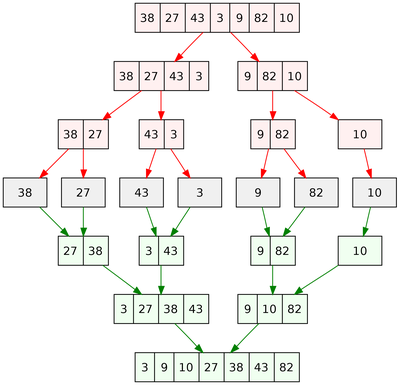

In [17]:
from IPython.display import Image
filename = 'merge_sort.png'
Image(pics/filename)

In [18]:
# from IPython.core.debugger import set_trace

def merge_sort(data):
    print('-'*60)
    print(f'data : {data}')
    
    # termination case
    if len(data) <= 1:
#         print('End of division')
        return
    
    mid = len(data) // 2
    left_data = data[:mid]
    right_data = data[mid:]
    
    # recursive calls
    merge_sort(left_data)
    merge_sort(right_data)

    left_index = 0
    right_index = 0
    data_index = 0
    # sorting steps     
    while left_index < len(left_data) and right_index < len(right_data):
        if left_data[left_index] < right_data[right_index]:
            data[data_index] = left_data[left_index]
            left_index += 1
        else:
            data[data_index] = right_data[right_index]
            right_index += 1
        data_index += 1

    if left_index < len(left_data):
        del data[data_index:]
        data += left_data[left_index:]
        
    elif right_index < len(right_data):
        del data[data_index:]
        data += right_data[right_index:]
        
#     print(f'data after sort: {data}')
if __name__ == '__main__':
#     data = [9, 1, 7, 6, 2, 8, 5, 3, 4, 0]
    data = [2,10,5,1]
    merge_sort(data)
    print(data)

------------------------------------------------------------
data : [2, 10, 5, 1]
------------------------------------------------------------
data : [2, 10]
------------------------------------------------------------
data : [2]
------------------------------------------------------------
data : [10]
------------------------------------------------------------
data : [5, 1]
------------------------------------------------------------
data : [5]
------------------------------------------------------------
data : [1]
[1, 2, 5, 10]


______
## Calculating Scale of Big-O

When it comes to Big O notation we only care about the most significant terms, remember as the input grows larger **only the fastest growing terms will matter**. If you've taken a calculus class before, this will remind you of taking limits towards infinity. 

In [19]:
def print_once(lst): # O(n)
    '''
    Prints all items once
    '''
    for val in lst:
        print(val)

In [20]:
print_once(lst)

0
1
2
3


The print_once() function is O(n) since it will scale linearly with the input. What about the next example?

In [21]:
def print_3(lst): # O(3*n) => O(n)
    '''
    Prints all items three times
    '''
    for val in lst:
        print(val)
        
    for val in lst:
        print(val)
        
    for val in lst:
        print(val)

In [22]:
print_3(lst)

0
1
2
3
0
1
2
3
0
1
2
3


We can see that the first function will print O(n) items and the second will print O(3n) items. However for n going to infinity the constant can be dropped, since it will not have a large effect, so both functions are O(n). Trading a nested loop for consequential loops is always better.

______

### More complicated linear example

In [23]:
def comp(lst):
    '''
    This function prints the first item O(1)
    Then it prints the first 1/2 of the list O(n/2)
    Then prints a string 10 times O(10)
    '''
    print(lst[0]) # O(1)
    
    midpoint = len(lst)//2
    
    for val in lst[:midpoint]: # O(n/2)
        print(val)
        
    for x in range(10): # O(10)
        print('number')

In [24]:
lst = [1,2,3,4,5,6,7,8,9,10]

comp(lst)

1
1
2
3
4
5
number
number
number
number
number
number
number
number
number
number


So let's break down the operations here. We can combine each operation to get the total Big-O of the function:

$$O(1 + n/2 + 10) => O(n)$$

We can see that as n grows larger the 1 and 10 terms become insignificant and the 1/2 term multiplied against n will also not have much of an effect as n goes towards infinity. This means the function is simply O(n)!

## Worst Case vs Best Case

Many times we are only concerned with the worst possible case of an algorithm, but in an interview setting its important to keep in mind that worst case and best case scenarios may be completely different Big-O times. For example, consider the following function:

In [25]:
def matcher(lst,match):
    '''
    Given a list lst, return a boolean indicating if match item is in the list
    '''
    for item in lst:
        if item == match:
            return True
    return False

In [26]:
lst

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [27]:
# Big Omega
# best case time complexity (match is found at the first element) - O(1)
%timeit matcher(lst,1)

466 ns ± 7.03 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [28]:
# Big O
# worse case time complexity (there is no element that matches) - O(n)
%timeit matcher(lst,11)

1.35 µs ± 17.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Space Complexity

Many times we are also concerned with how much memory/space an algorithm uses. The notation of space complexity is the same, but instead of checking the time of operations, we check the size of the allocation of memory. **Variable assignment** counts as space complexity.

In [29]:
def printer(n=10):
    '''
    Prints "hello world!" n times
    '''
    # variable assignment counts as space complexity 
    for x in range(n):
        print('Hello World!') # space complexity O(1) time complexity O(n)

In [30]:
# there can be trade-offs with space and time complexity
printer()

Hello World!
Hello World!
Hello World!
Hello World!
Hello World!
Hello World!
Hello World!
Hello World!
Hello World!
Hello World!


Note how we only assign the 'hello world!' variable once, not every time we print. So the algorithm has O(1) **space** complexity and an O(n) **time** complexity. 

Let's see an example of O(n) **space** complexity:

In [31]:
def create_list(n):
    new_list = []
    
    for num in range(n):
        new_list.append('new')
    
    return new_list

In [32]:
print(create_list(5))

['new', 'new', 'new', 'new', 'new']


Note how the size of the new_list object scales with the input **n**, this shows that it is an O(n) algorithm with regards to **space** complexity.

## Helpful resources 

* [Big-O introduction stack overflow](http://stackoverflow.com/questions/487258/plain-english-explanation-of-big-o/487278#487278)

* [log(n) time complexity](http://stackoverflow.com/questions/2307283/what-does-olog-n-mean-exactly)

* [Towards data science Big-O](https://towardsdatascience.com/understanding-time-complexity-with-python-examples-2bda6e8158a7)

## Python data structures and Big-O analysis 

### Lists

Indexing and assigning to an index position are operations that run in constant time **O(1)**

In [33]:
# concatenating list - 4
def method1(): 
    l = []
    for n in range(10000):
        l = l + [n]

# appending - 3
def method2():
    l = []
    for n in range(10000):
        l.append(n)

# list comprehesion - 2
def method3():
    l = [n for n in range(10000)]

# range function - 1
def method4():
    l = list(range(10000))

In [34]:
%timeit method1()
%timeit method2()
%timeit method3()
%timeit method4()

340 ms ± 5.91 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.08 ms ± 83.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.14 ms ± 13.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
547 µs ± 35 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


We can clearly see that the most effective method is the built-in range() function in Python!

It is important to keep these factors in mind when writing efficient code. More importantly begin thinking about how we are able to index with O(1). We will discuss this in more detail when we cover arrays general. For now, take a look at the table below for an overview of Big-O efficiencies.

### Table of Big-O for common list operations

<table>
    <tr>
        <th>Operation </th>
        <th>Big-O Efficiency</th>
    </tr>
    <tr>
        <td>index []</td>
        <td>O(1)</td>
    </tr>
    <tr>
        <td>index assignment</td>
        <td>O(1)</td>
    </tr>
    <tr>
        <td>append</td>
        <td>O(1)</td>
    </tr>
    <tr>
        <td>pop()</td>
        <td>O(1)</td>
    </tr>
    <tr>
        <td>pop(i)</td>
        <td>O(n)</td>
    </tr>
    <tr >
        <td>insert(i,item)</td>
        <td>O(n)</td>
    </tr>
    <tr>
        <td>del operator</td>
        <td>O(n)</td>
    </tr>
    <tr>
        <td>iteration</td>
        <td>O(n)</td>
    </tr>
    <tr>
        <td>contains (in)</td>
        <td>O(n)</td>
    </tr>
    <tr>
        <td>get slice [x:y]</td>
        <td>O(k)</td>
    </tr>
    <tr>
        <td>del slice</td>
        <td>O(n)</td>
    </tr>
    <tr>
        <td>set slice</td>
        <td>O(n+k)</td>
    </tr>
    <tr>
        <td>reverse</td>
        <td>O(n)</td>
    </tr>
    <tr>
        <td>concatenate</td>
        <td>O(k)</td>
    </tr>
    <tr>
        <td>sort</td>
        <td>O(n log n)</td>
    </tr>
    <tr>
        <td>multiply</td>
        <td>O(nk)</td>
    </tr>

</table>

### Dictionaries

Dictionaries in Python are an implementation of a hash table. They operate with keys and values, for example:

In [35]:
d = {'k1':1,'k2':2}

In [36]:
d['k1']

1

Something that is pretty amazing is that **getting and setting items in a dictionary are O(1)!** Hash tables are designed with efficiency in mind, and we will explore them in much more detail later on in the course as one of the most important data structures to undestand. In the meantime, refer to the table below for Big-O efficiencies of common dictionary operations:

<table border="1">
<thead valign="bottom">
<tr class="row-odd"><th class="head">Operation</th>
<th class="head">Big-O Efficiency</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>copy</td>
<td>O(n)</td>
</tr>
<tr class="row-odd"><td>get item</td>
<td>O(1)</td>
</tr>
<tr class="row-even"><td>set item</td>
<td>O(1)</td>
</tr>
<tr class="row-odd"><td>delete item</td>
<td>O(1)</td>
</tr>
<tr class="row-even"><td>contains (in)</td>
<td>O(1)</td>
</tr>
<tr class="row-odd"><td>iteration</td>
<td>O(n)</td>
</tr>
</tbody>
</table>